usa medie con classi per creare exemplars


**Import libraries**

In [1]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, ConcatDataset

import torchvision
from torchvision import datasets, models, transforms

import numpy as np
from tqdm import tqdm
import random

from data_loader import iCIFAR100
from model import incrementalNet
from iCarl import iCaRLNet
from LF_iCarl import LFiCaRLNet

from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
#import modified_linear

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


**Prepare Dataset**

In [2]:
train_transform = transforms.Compose([transforms.RandomCrop(32, padding=4),
                                      transforms.RandomHorizontalFlip(),
                                      transforms.ToTensor(),       # Turn PIL Image to torch.Tensor
                                      transforms.Normalize((0.507, 0.487, 0.441), (0.267, 0.256, 0.276)) 
])
eval_transform = transforms.Compose([transforms.ToTensor(),       # Turn PIL Image to torch.Tensor
                                      transforms.Normalize((0.507, 0.487, 0.441), (0.267, 0.256, 0.276)) 
])

In [3]:
random.seed(34)
order = np.arange(0,100)
random.shuffle(order)

LEARNING WITHOUT FORGETTING/FINETUNING



In [4]:
# BATCH_SIZE = 128
# iNet = incrementalNet(10, 100, finetuning=True, verbose = False)
# iNet.cuda()

# conf_matrix_pred = []
# conf_matrix_labels = []
# for i in range(0,100,10):

#   train_dataset = iCIFAR100("cifar-100", classes=order[i:(i+10)],  train=True, download=True, transform=train_transform)
#   test_dataset = iCIFAR100("cifar-100", classes=order[0:(i+10)], train=False, transform=eval_transform)

#   test_dataloader = DataLoader(test_dataset, batch_size=BATCH_SIZE, 
#                                shuffle=False, num_workers=4, drop_last=False)
#   train_dataloader = DataLoader(train_dataset, batch_size=BATCH_SIZE, 
#                                 shuffle=False, num_workers=4, drop_last=False)

#   iNet.update_representation(train_dataset, order)

#   iNet.n_known += iNet.n_classes
#   print ("\niCaRL classes: %d" % iNet.n_known)

#   total = 0.0
#   correct = 0.0
#   iNet.resnet.train(False)
#   for images, labels in train_dataloader:
#       images = images.to(device="cuda")
#       labels = labels.to(device="cuda")
#       preds = iNet.forward(images)
#       _, preds = torch.max(preds.data, 1)
#       #preds = torch.tensor([order[i] for i in preds]).cuda()
#       total += labels.size(0)
#       correct += (preds == labels.data).sum()
#   accuracy = 100 * correct / total
#   print('Train Accuracy: %.1f %%' % (accuracy))

#   if iNet.finetuning:
#     suf = 'finetuning.txt'
#   else:
#     suf = 'lwf.txt'

#   with open("train_accuracy_"+suf, "a") as f:
#     f.write(str(accuracy.data)+"\n")

#   total = 0.0
#   correct = 0.0
#   for images, labels in test_dataloader:
#       images = images.to(device="cuda")
#       labels = labels.to(device="cuda")
#       preds = iNet.forward(images)
#       _, preds = torch.max(preds.data, 1)
#       #preds = torch.tensor([order[i] for i in preds]).cuda()
#       total += labels.size(0)
#       correct += (preds == labels.data).sum()
#       if iNet.n_known == 100:
#         conf_matrix_pred += list(preds.data)
#         conf_matrix_labels += list(labels.data)
#   accuracy = 100 * correct / total
#   print('Test Accuracy: %.1f %%\n---------------' % (accuracy))
#   with open("test_accuracy_"+suf, "a") as f:
#     f.write(str(accuracy.data)+"\n")

**ICARL**

In [5]:
# K = 2000 # number of exemplars
# cl_name = 'trees'
# loss_combination = 'bce+bce'


# icarl = iCaRLNet(10, 100, eval_transform, loss=loss_combination, classifier_name=cl_name, verbose=False)
# icarl.cuda()
# BATCH_SIZE = 128

# conf_matrix_pred = []
# conf_matrix_labels = []
# for i in range(0,100,10):
  
#   train_dataset = iCIFAR100("cifar-100", classes=order[i:(i+10)],  train=True, download=True, transform=train_transform)
#   test_dataset = iCIFAR100("cifar-100", classes=order[0:(i+10)], train=False, transform=eval_transform)

#   train_dataloader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=False, num_workers=4)
#   test_dataloader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False, num_workers=4)

#   icarl.update_representation(train_dataset, order)

#   icarl.n_known += icarl.n_classes
#   m = int(K / icarl.n_known)

#   # Compute centroids before exemplars reduction
#   if cl_name == 'standard':
#     icarl.compute_means_and_features(train_dataset)

#   # Reduce exemplar sets for known classes
#   icarl.reduce_exemplar_sets(m)
  
#   # Construct exemplar sets for new classes
#   for y in tqdm(order[i:(i+10)], desc="Generating exemplars"):
#     images = train_dataset.get_image_class(y)
#     icarl.construct_exemplar_set(images, m)

#   # Compute features after exemplars construction
#   if cl_name != 'standard':
#     icarl.compute_means_and_features(train_dataset)

  
#   print ("\niCaRL classes: %d" % icarl.n_known)

#   total = 0.0
#   correct = 0.0
#   icarl.resnet.eval()
#   for images, labels in train_dataloader:
#       images = images.to(device="cuda")
#       preds = icarl.classify(images)
#       total += labels.size(0)
#       correct += (preds.data.cpu() == labels).sum()
#   accuracy = 100 * correct / total
#   print('Train Accuracy: %.3f %%' % (accuracy))
#   with open("train_accuracy_iCaRL.txt", "a") as f:
#     f.write(str(accuracy.data)+"\n")


#   total = 0.0
#   correct = 0.0
#   icarl.resnet.eval()
#   for images, labels in test_dataloader:
#       images = images.to(device="cuda")
#       preds = icarl.classify(images)
#       total += labels.size(0)
#       correct += (preds.data.cpu() == labels).sum()
#       if icarl.n_known == 100:
#         conf_matrix_pred += list(preds.data)
#         conf_matrix_labels += list(labels.data)
#   accuracy = 100 * correct / total
#   print('Test Accuracy: %.3f %%\n---------------' % (accuracy))
#   with open("test_accuracy_iCaRL.txt", "a") as f:
#     f.write(str(accuracy.data)+"\n")

In [6]:
K = 2000 # number of exemplars


icarl = LFiCaRLNet(10, 100, eval_transform, verbose=False)
icarl.cuda()
BATCH_SIZE = 128

conf_matrix_pred = []
conf_matrix_labels = []
for i in range(0,100,10):
  
  train_dataset = iCIFAR100("cifar-100", classes=order[i:(i+10)],  train=True, download=True, transform=train_transform)
  test_dataset = iCIFAR100("cifar-100", classes=order[0:(i+10)], train=False, transform=eval_transform)

  train_dataloader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=False, num_workers=4)
  test_dataloader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False, num_workers=4)

  icarl.update_representation(train_dataset, order)

  icarl.n_known += icarl.n_classes
  m = int(K / icarl.n_known)

  # Compute centroids before exemplars reduction
  icarl.compute_means_and_features(train_dataset)

  # Reduce exemplar sets for known classes
  icarl.reduce_exemplar_sets(m)
  
  # Construct exemplar sets for new classes
  for y in tqdm(order[i:(i+10)], desc="Generating exemplars"):
    images = train_dataset.get_image_class(y)
    icarl.construct_exemplar_set(images, m)
  
  print ("\niCaRL classes: %d" % icarl.n_known)

  total = 0.0
  correct = 0.0
  icarl.resnet.eval()
  for images, labels in train_dataloader:
      images = images.to(device="cuda")
      preds = icarl.classify(images)
      total += labels.size(0)
      correct += (preds.data.cpu() == labels).sum()
  accuracy = 100 * correct / total
  print('Train Accuracy: %.3f %%' % (accuracy))
  with open("train_accuracy_LF_iCaRL.txt", "a") as f:
    f.write(str(accuracy.data)+"\n")


  total = 0.0
  correct = 0.0
  icarl.resnet.eval()
  for images, labels in test_dataloader:
      images = images.to(device="cuda")
      preds = icarl.classify(images)
      total += labels.size(0)
      correct += (preds.data.cpu() == labels).sum()
      if icarl.n_known == 100:
        conf_matrix_pred += list(preds.data)
        conf_matrix_labels += list(labels.data)
  accuracy = 100 * correct / total
  print('Test Accuracy: %.3f %%\n---------------' % (accuracy))
  with open("test_accuracy_LF_iCaRL.txt", "a") as f:
    f.write(str(accuracy.data)+"\n")

Files already downloaded and verified


Generating exemplars: 100%|██████████| 10/10 [00:22<00:00,  2.26s/it]


iCaRL classes: 10


Train Accuracy: 97.500 %
Test Accuracy: 85.800 %
---------------
Files already downloaded and verified


Generating exemplars: 100%|██████████| 10/10 [00:22<00:00,  2.22s/it]


iCaRL classes: 20


Train Accuracy: 99.857 %
Test Accuracy: 79.800 %
---------------
Files already downloaded and verified


Generating exemplars: 100%|██████████| 10/10 [00:22<00:00,  2.22s/it]


iCaRL classes: 30


Train Accuracy: 99.543 %
Test Accuracy: 70.533 %
---------------
Files already downloaded and verified


Generating exemplars: 100%|██████████| 10/10 [00:21<00:00,  2.13s/it]


iCaRL classes: 40


Train Accuracy: 99.011 %
Test Accuracy: 63.500 %
---------------
Files already downloaded and verified


Generating exemplars: 100%|██████████| 10/10 [00:21<00:00,  2.11s/it]


iCaRL classes: 50


Train Accuracy: 98.429 %
Test Accuracy: 56.440 %
---------------
Files already downloaded and verified


Generating exemplars: 100%|██████████| 10/10 [00:20<00:00,  2.05s/it]


iCaRL classes: 60


Train Accuracy: 97.771 %
Test Accuracy: 53.800 %
---------------
Files already downloaded and verified


Generating exemplars: 100%|██████████| 10/10 [00:20<00:00,  2.03s/it]


iCaRL classes: 70


Train Accuracy: 97.378 %
Test Accuracy: 52.971 %
---------------
Files already downloaded and verified


Generating exemplars: 100%|██████████| 10/10 [00:20<00:00,  2.05s/it]


iCaRL classes: 80


Train Accuracy: 95.603 %
Test Accuracy: 49.600 %
---------------
Files already downloaded and verified


Generating exemplars: 100%|██████████| 10/10 [00:20<00:00,  2.03s/it]


iCaRL classes: 90


Train Accuracy: 94.600 %
Test Accuracy: 46.733 %
---------------
Files already downloaded and verified


Generating exemplars: 100%|██████████| 10/10 [00:20<00:00,  2.04s/it]


iCaRL classes: 100


Train Accuracy: 93.195 %
Test Accuracy: 44.440 %
---------------


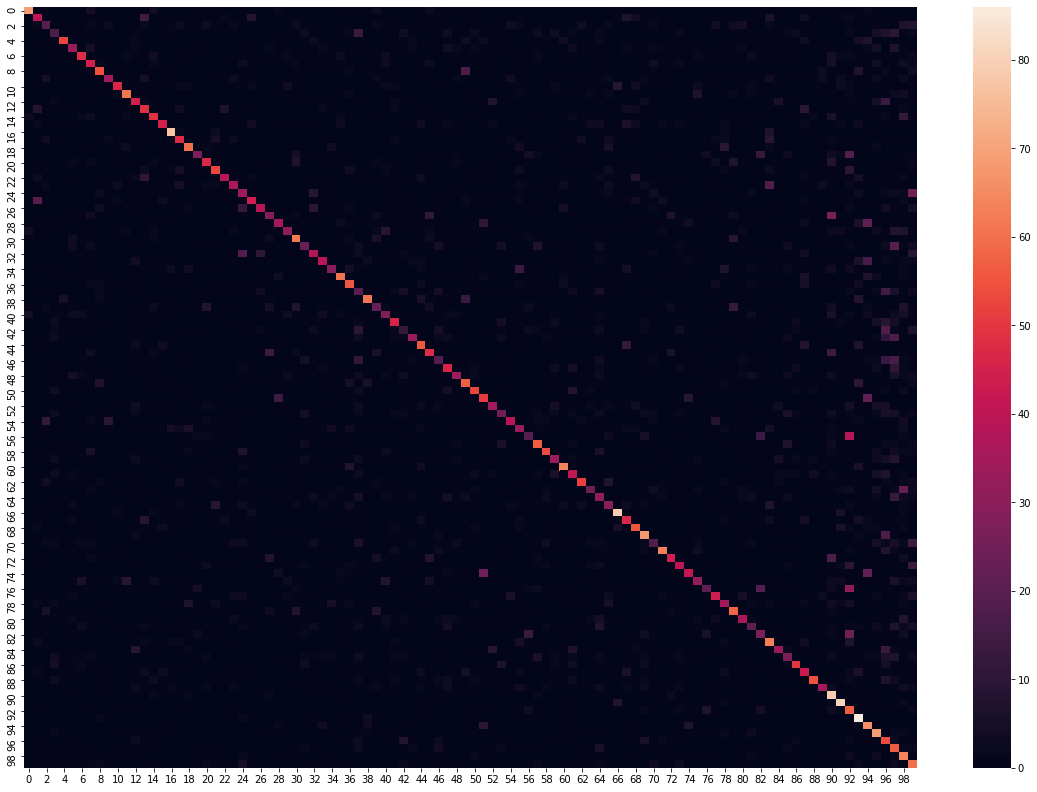

In [7]:
array = confusion_matrix([list(order).index(i.item()) for i in conf_matrix_labels], [list(order).index(i.item()) for i in conf_matrix_pred])
df_cm = pd.DataFrame(array, range(100), range(100))
plt.figure(figsize = (20,14))
sn.heatmap(df_cm) 